In [1]:
# https://realpython.com/python-keras-text-classification/

In [2]:
import pandas as pd

In [3]:
filepath_dict = {
    'yelp': 'yelp_labelled.txt',
    'amazon': 'amazon_cells_labelled.txt',
    'imdb': 'imdb_labelled.txt'
}

In [4]:
df_list = []

In [5]:
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source
    df_list.append(df)

In [6]:
df = pd.concat(df_list)

In [7]:
print(df.iloc[0])

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)

In [10]:
sentences = ['John likes ice cream', 'John hates chocolate.']

In [11]:
vectorizer.fit(sentences)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=0,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [12]:
vectorizer.vocabulary_

{'John': 0, 'likes': 5, 'ice': 4, 'cream': 2, 'hates': 3, 'chocolate': 1}

In [13]:
vectorizer.transform(sentences).toarray()

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_yelp = df[df['source'] == 'yelp']

In [16]:
sentences = df_yelp['sentence'].values

In [17]:
y = df_yelp['label'].values

In [18]:
sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.25, random_state=1000
)

In [19]:
vectorizer = CountVectorizer()

In [20]:
vectorizer.fit(sentences_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [21]:
X_train = vectorizer.transform(sentences_train)

In [22]:
X_test = vectorizer.transform(sentences_test)

In [23]:
X_train

<750x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 7368 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
classifier = LogisticRegression()

In [26]:
classifier.fit(X_train, y_train)

/home/user/.virtualenvs/solenie3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
score = classifier.score(X_test, y_test)

In [28]:
print('Accuracy:', score)

Accuracy: 0.796


In [29]:
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values
    
    sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.25, random_state=1000
    )
    
    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test = vectorizer.transform(sentences_test)
    
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print('Accuracy for {} data: {:.4f}'.format(source, score))

Accuracy for yelp data: 0.7960
Accuracy for amazon data: 0.7960
Accuracy for imdb data: 0.7487


In [30]:
from keras.models import Sequential

Using TensorFlow backend.


In [31]:
from keras import layers

In [32]:
input_dim = X_train.shape[1]

In [33]:
model = Sequential()

In [34]:
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))

In [35]:
model.add(layers.Dense(1, activation='sigmoid'))

In [36]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                25060     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 25,071
Trainable params: 25,071
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

In [39]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)

In [40]:
print('Training accuracy: {:.4f}'.format(accuracy))

Training accuracy: 1.0000


In [41]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)

In [42]:
print('Testing accuracy: {:.4f}'.format(accuracy))

Testing accuracy: 0.7861


In [43]:
import matplotlib.pyplot as plt

In [44]:
plt.style.use('ggplot')

In [45]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

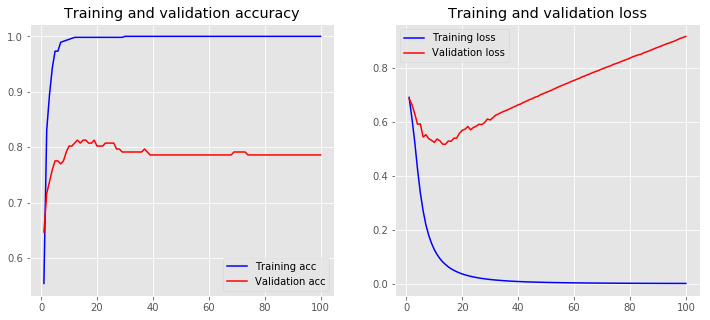

In [46]:
plot_history(history)

In [47]:
# representing words
cities = ['London', 'Berlin', 'Berlin', 'New York', 'London']

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
encoder = LabelEncoder()

In [50]:
city_labels = encoder.fit_transform(cities)

In [51]:
city_labels

array([1, 0, 0, 2, 1])

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
encoder = OneHotEncoder(sparse=False)

In [54]:
city_labels = city_labels.reshape((5, 1))

In [55]:
encoder.fit_transform(city_labels)

/home/user/.virtualenvs/solenie3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [56]:
from keras.preprocessing.text import Tokenizer

In [57]:
tokenizer = Tokenizer(num_words=5000)

In [58]:
tokenizer.fit_on_texts(sentences_train)

In [59]:
X_train = tokenizer.texts_to_sequences(sentences_train)

In [60]:
X_test = tokenizer.texts_to_sequences(sentences_test)

In [61]:
vocab_size = len(tokenizer.word_index) + 1

In [62]:
print(sentences_train[2])

I am a fan of his ... This movie sucked really bad.  


In [63]:
print(X_train[2])

[7, 150, 2, 932, 4, 49, 6, 11, 563, 45, 30]


In [64]:
for word in ['the', 'all', 'movie']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 1
all: 27
movie: 11


In [65]:
vocab_size

2575

In [66]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100

In [67]:
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)

In [68]:
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [69]:
print(X_train[0, :])

[170 116 390  35   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [70]:
from keras import layers

In [71]:
embedding_dim = 50

In [72]:
model = Sequential()

In [73]:
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))

In [74]:
model.add(layers.Flatten())

In [75]:
model.add(layers.Dense(10, activation='relu'))

In [76]:
model.add(layers.Dense(1, activation='sigmoid'))

In [77]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 178,771
Trainable params: 178,771
Non-trainable params: 0
_________________________________________________________________


In [79]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

In [80]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)

In [81]:
print('Training accuracy: {:.4f}'.format(accuracy))

Training accuracy: 1.0000


In [82]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)

In [83]:
print('Test accuracy: {:.4f}'.format(accuracy))

Test accuracy: 0.6738


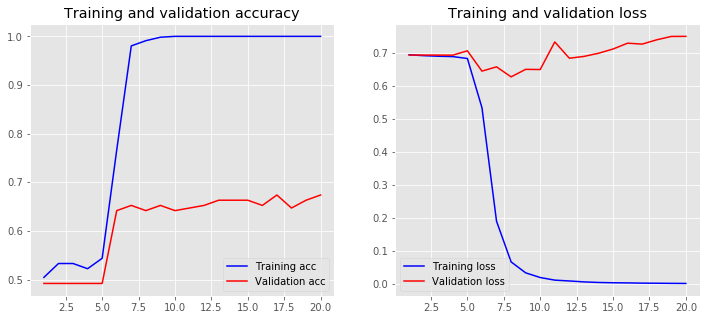

In [84]:
plot_history(history)

In [85]:
model = Sequential()

In [86]:
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))

In [87]:
model.add(layers.GlobalMaxPool1D())

In [88]:
model.add(layers.Dense(10, activation='relu'))

In [89]:
model.add(layers.Dense(1, activation='sigmoid'))

In [90]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 129,271
Trainable params: 129,271
Non-trainable params: 0
_________________________________________________________________


In [92]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Training accuracy: 1.0000
Testing accuracy:  0.7326


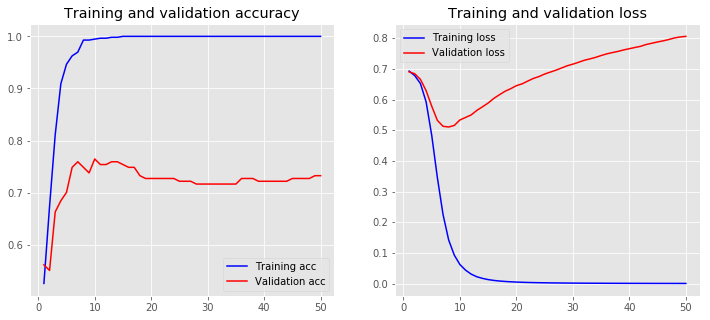

In [93]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [94]:
import numpy as np

In [95]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    
    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix

In [96]:
embedding_dim = 50

In [97]:
import settings
filepath = settings.DATA_DIR / 'glove.6B.50d.txt'

In [98]:
embedding_matrix = create_embedding_matrix(
    filepath,
    tokenizer.word_index, embedding_dim
)

In [99]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))

In [100]:
nonzero_elements / vocab_size

0.9522330097087378

In [101]:
model = Sequential()

In [102]:
model.add(layers.Embedding(vocab_size, embedding_dim,
                           weights=[embedding_matrix],
                           input_length=maxlen,
                           trainable=False))

In [103]:
model.add(layers.GlobalMaxPool1D())

In [104]:
model.add(layers.Dense(10, activation='relu'))

In [105]:
model.add(layers.Dense(1, activation='sigmoid'))

In [106]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [107]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 129,271
Trainable params: 521
Non-trainable params: 128,750
_________________________________________________________________


In [108]:
history = model.fit(X_train, y_train,
                    epochs=50, verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

In [109]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)

Training accuracy: 0.7647
Testing accuracy:  0.7647


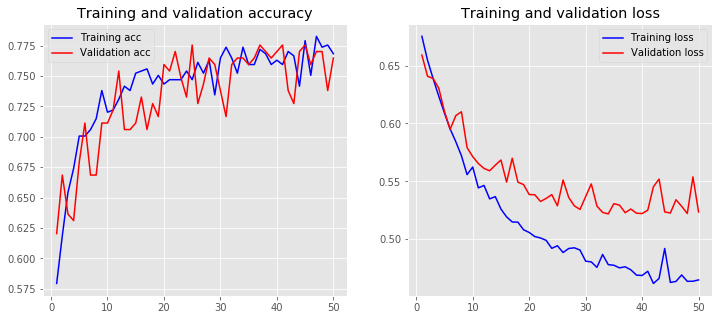

In [110]:
print('Training accuracy: {:.4f}'.format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print('Testing accuracy:  {:.4f}'.format(accuracy))
plot_history(history)

In [111]:
model = Sequential()

In [112]:
model.add(layers.Embedding(vocab_size, embedding_dim,
                           weights=[embedding_matrix],
                           input_length=maxlen,
                           trainable=True))

In [113]:
model.add(layers.GlobalMaxPool1D())

In [114]:
model.add(layers.Dense(10, activation='relu'))

In [115]:
model.add(layers.Dense(1, activation='sigmoid'))

In [116]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [117]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 129,271
Trainable params: 129,271
Non-trainable params: 0
_________________________________________________________________


In [118]:
history = model.fit(X_train, y_train,
                    epochs=50, verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Training accuracy: 1.0000
Testing accuracy:  0.7861


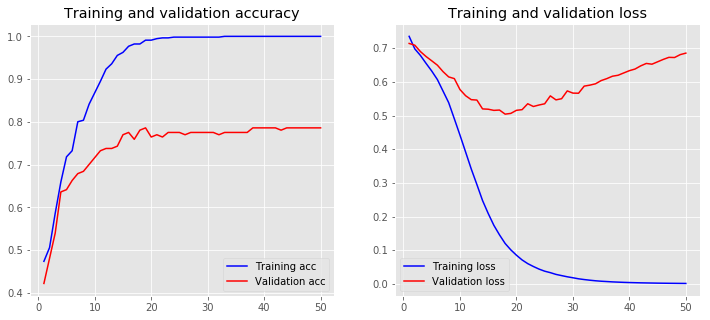

In [119]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print('Training accuracy: {:.4f}'.format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print('Testing accuracy:  {:.4f}'.format(accuracy))
plot_history(history)

In [120]:
embedding_dim = 100

In [121]:
model = Sequential()

In [122]:
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))

In [123]:
model.add(layers.Conv1D(128, 5, activation='relu'))

In [124]:
model.add(layers.GlobalMaxPooling1D())

In [125]:
model.add(layers.Dense(10, activation='relu'))

In [126]:
model.add(layers.Dense(1, activation='sigmoid'))

In [127]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [128]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          257500    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 322,929
Trainable params: 322,929
Non-trainable params: 0
_________________________________________________________________


Training accuracy: 1.0000
Testing accuracy:  0.7914


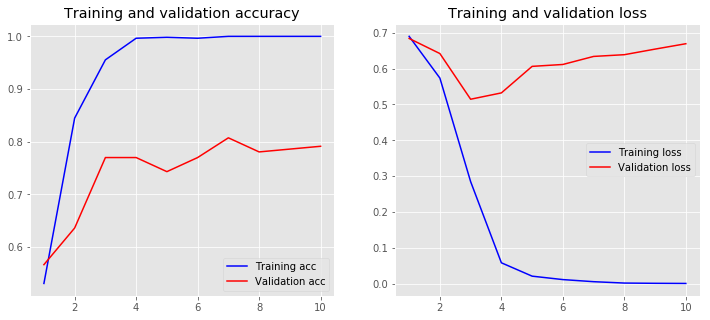

In [130]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print('Training accuracy: {:.4f}'.format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print('Testing accuracy:  {:.4f}'.format(accuracy))
plot_history(history)

In [139]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [132]:
param_grid = dict(
    num_filters=[32, 64, 128],
    kernel_size=[3, 5, 7],
    vocab_size=[5000],
    embedding_dim=[50],
    maxlen=[100]
)

In [133]:
from keras.wrappers.scikit_learn import KerasClassifier

In [134]:
from sklearn.model_selection import RandomizedSearchCV

In [142]:
# Main settings
epochs = 20
embeddng_dim = 50
maxlen = 100
output_file = 'output.txt'

In [143]:
for source, frame in df.groupby('source'):
    print('Running grid search for data set:', source)
    sentences = df['sentence'].values
    y = df['label'].values
    
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(sentences_train)
    X_train = tokenizer.texts_to_sequences(sentences_train)
    X_test = tokenizer.texts_to_sequences(sentences_test)
    
    vocab_size = len(tokenizer.word_index) + 1
    
    X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
    X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
    
    param_grid = dict(
        num_filters=[32, 64, 128],
        kernel_size=[3, 5, 7],
        vocab_size=[vocab_size],
        embedding_dim=[embedding_dim],
        maxlen=[maxlen],
    )
    model = KerasClassifier(
        build_fn=create_model,
        epochs=epochs,
        batch_size=10,
        verbose=False,
    )
    grid = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        cv=4,
        verbose=1,
        n_iter=5,
    )
    grid_result = grid.fit(X_train, y_train)
    
    test_accuracy = grid.score(X_test, y_test)
    
    with open(output_file, 'a') as f:
        s = ('Running {} data set\n Best accuracy: '
             '{:.4f}\n{}\Test accuracy: {:.4f}\n\n')
        output_string = s.format(
            source,
            grid_result.best_score_,
            grid_result.best_params_,
            test_accuracy,
        )
        print(output_string)
        f.write(output_string)

Running grid search for data set: amazon
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  5.5min finished


Running amazon data set
 Best accuracy: 0.7594
{'vocab_size': 2575, 'num_filters': 128, 'maxlen': 100, 'kernel_size': 3, 'embedding_dim': 100}\Test accuracy: 0.7594


Running grid search for data set: imdb
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  5.2min finished


Running imdb data set
 Best accuracy: 0.7647
{'vocab_size': 2575, 'num_filters': 128, 'maxlen': 100, 'kernel_size': 3, 'embedding_dim': 100}\Test accuracy: 0.7861


Running grid search for data set: yelp
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  6.1min finished


Running yelp data set
 Best accuracy: 0.7594
{'vocab_size': 2575, 'num_filters': 64, 'maxlen': 100, 'kernel_size': 7, 'embedding_dim': 100}\Test accuracy: 0.7754


